<a href="https://colab.research.google.com/github/scottspurlock/csc401-2021s/blob/main/labs/lab13_clustering_srs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 13
## Clustering

### Part A: Image Quantization

In [1]:
# import the necessary packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [2]:
from matplotlib import image as img

# load the image
# Note that you'll need to upload your image to your Colab storage
# or else use a full URL to an image on the internet.
image_path = 'chick.jpg'
image = img.imread(image_path)

if image is None:
    print('********************************************')
    print('*** Unable to load image', image_path)
    print('********************************************\n')

image.shape


(333, 500, 3)

Image loaded ( 166 x 250 )


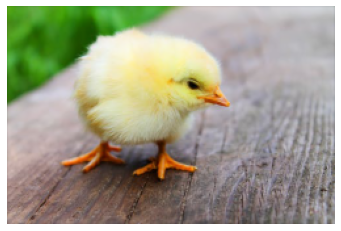

In [3]:
from skimage.transform import resize

# Resize to make things faster
# You can play with what fraction to use for resizing.
image = resize(image, (image.shape[0] // 2, image.shape[1] // 2),
               anti_aliasing=True, mode='constant')

# Normalize pixel values between 0 and 1
image = image / image.max()

# get the height, width, and number of color channels (3)
h, w, ch = image.shape

print('Image loaded (', h, 'x', w, ')')

# show the image
plt.figure()
plt.axis("off")
plt.imshow(image);

In [4]:
# reshape the image to be a list of pixels
# each pixel is a row with 3 columns (R G B)
pixels = image.reshape((h * w, 3))
print('pixels is', pixels.shape)

# First 5 rows
pixels[:5]



pixels is (41500, 3)


array([[0.29242363, 0.55925671, 0.09255526],
       [0.31114221, 0.60060715, 0.09649227],
       [0.30719334, 0.60749099, 0.08565957],
       [0.30128783, 0.60846931, 0.07384854],
       [0.29636064, 0.60552248, 0.08172256]])

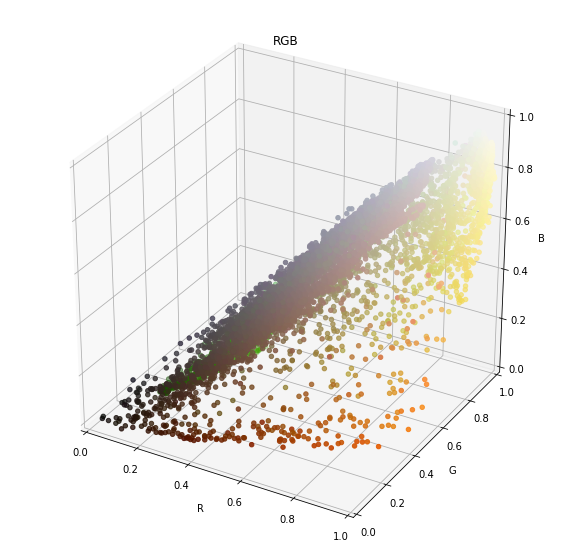

In [5]:
# ---------------------------------------------------------------------
# Show 3D plot of all the pixels in terms of red, green, and blue
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('RGB')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B')
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
data = pixels
subsample = 5
data = data[::subsample]
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=data)
plt.show()



In [6]:
# cluster the pixel intensities
k = 7
print('Running Kmeans on list of', pixels.shape[0], 'pixels with k =', k, '...')
clt = KMeans(n_clusters=k)
clt.fit(pixels)
print('Kmeans complete')

# Assign each pixel to the closest cluster center
cluster_labels = clt.predict(pixels)


Running Kmeans on list of 41500 pixels with k = 7 ...
Kmeans complete


In [7]:
print('These are the locations of the cluster centers (R G B)')
clt.cluster_centers_

These are the locations of the cluster centers (R G B)


array([[0.47416128, 0.39921305, 0.35784054],
       [0.73572953, 0.71126464, 0.7143994 ],
       [0.24749397, 0.55449516, 0.11615075],
       [0.85816231, 0.78962012, 0.45961609],
       [0.92325156, 0.90903896, 0.77958495],
       [0.2704713 , 0.21205397, 0.11141097],
       [0.60084136, 0.56624533, 0.55602818]])

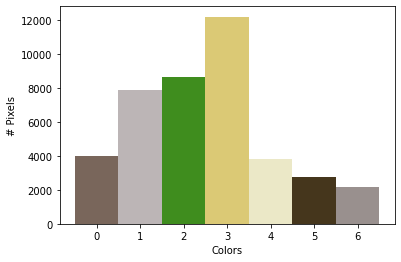

In [8]:
# Get the list of cluster centers
colors = clt.cluster_centers_

# Count how many pixels have been assigned to each cluster label
counts = {}
for label in cluster_labels:
    if not label in counts:
        counts[label] = 1
    else:
        counts[label] += 1

# Show histogram of pixel counts for each cluster
plt.figure()
x = np.arange(k)
plt.bar(x, counts.values(), color=colors, width=1)
plt.xticks(x)
plt.xlabel('Colors')
plt.ylabel('# Pixels')
plt.show()


[[0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]
 [0.24749397 0.55449516 0.11615075]]


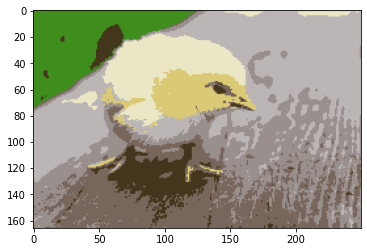

In [9]:
# Assign each pixel to be the color of its closest cluster center
quant = colors[cluster_labels]
print(quant[:5])

# reshape list of RGB values back into an image
img = quant.reshape((h, w, ch))

plt.figure()
plt.imshow(img)
plt.show()

## Part B: State Weather

In [10]:
import pandas as pd
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1eb8ptJBgNsbtXVQ2tRSNt_GhP_4xej6b')
df.head(10)

,state,temp,snowfall
0,AL,46.5,1.6
1,AK,2.6,74.5
2,AZ,43.6,0.3
3,AR,41.5,5.2
4,CA,46.2,0.0
5,CO,25.8,19.1
6,CT,28.5,40.5
7,DE,36.1,20.2
8,FL,59.4,0.0
9,GA,47.8,0.7


In [11]:
X = df[['temp', 'snowfall']]
X.head()

,temp,snowfall
0,46.5,1.6
1,2.6,74.5
2,43.6,0.3
3,41.5,5.2
4,46.2,0.0


In [12]:
print('Running Kmeans on list of', df.shape[0], 'states...')

# TO DO -----------

# Create a KMeans model with k clusters
k = 4
# print('Fill in a line of code here...')
clt = KMeans(n_clusters=k)

# Fit the model to the data (just temp and snowfall)
# print('Fill in a line of code here...')
clt.fit(X)

# Predict the cluster labels based on the data
# print('Fill in a line of code here...')
cluster_labels = clt.predict(X)



Running Kmeans on list of 50 states...


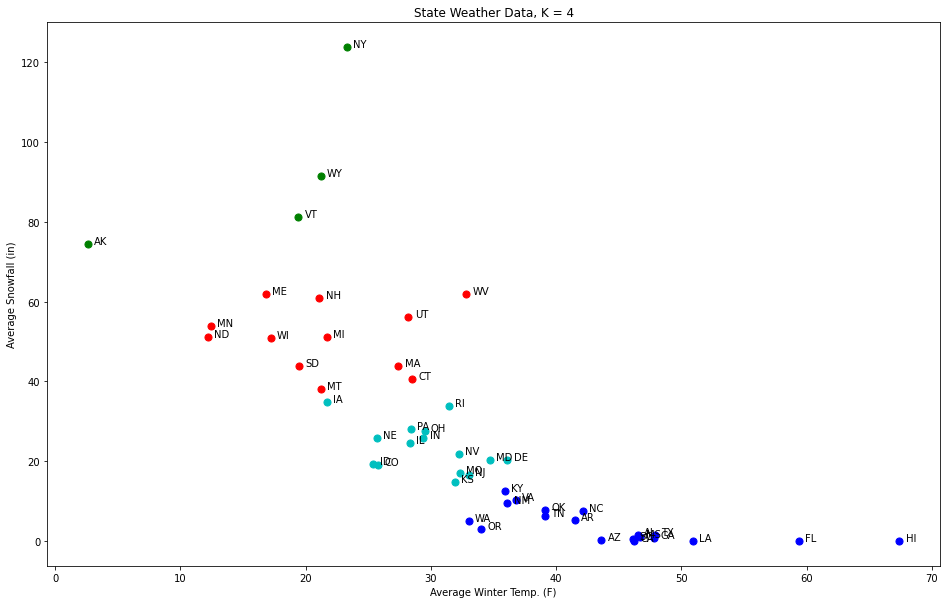

In [13]:
# ---------------------------------------------------------------------
# Visualization
colors =  ['b', 'r', 'g', 'c', 'm', 'y', 'k']
plt.figure(figsize=(16, 10))

# Plot states one at a time
for i, row in df.iterrows():
    # which cluster was this state assigned to?
    # (if you're getting an error here, make sure to create a variable named
    # cluster_labels in the cell above.)
    curr_label = cluster_labels[i]

    # which color should we use for this cluster?
    curr_color = colors[curr_label]

    # Plot this state
    plt.scatter(row['temp'], row['snowfall'], c=curr_color, s=50)

    # Add a text label for this state's name
    plt.text(row['temp']+0.5, row['snowfall'], row['state'], size=10)

plt.title('State Weather Data, K = ' + str(k))
plt.xlabel('Average Winter Temp. (F)')
plt.ylabel('Average Snowfall (in)')
plt.show()
